**Question 1:**

Fit a logistic regression model to the mushrooms dataset from the UCI data repository using 10-fold cross-validation. Next, fit a (Bernoulli) Naïve Bayes model to the same dataset using the same criteria.  First, report the average accuracy scores for each type of 

Next, generate aggregate contingency tables for each type of classifier. 

Which type of classifier would you use when trying to decide if you want to eat a mushroom? Why?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
mush_features = ["Edibility","Capshape", "Capsurface","Capcolor","Bruises","Odor","Gill_attachment","Gill_space","Gill_size","Gill_color","Stalk_shape","Stalk_root","Stalk_surface_br","Stalk_surface_ar","Stalk_color_ar","Stalk_color_br","Veil_type","Veil_color","Ring_no","Ring_type","Spore_color","Pop","Habitat"]
df_mushroom = pd.read_csv("agaricus-lepiota.data.txt",header = None, names = mush_features)
df_mushroom.shape

(8124, 23)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.utils import shuffle
 
mush_X = []

targetcols = ['Edibility']
datacols= ['Capshape', 'Capsurface','Capcolor','Bruises','Odor','Gill_attachment','Gill_space','Gill_size','Gill_color','Stalk_shape','Stalk_root','Stalk_surface_br','Stalk_surface_ar','Stalk_color_ar','Stalk_color_br','Veil_type','Veil_color','Ring_no','Ring_type','Spore_color','Pop','Habitat']
mush_shuffled = shuffle(df_mushroom)
mushroom_X = mush_shuffled[datacols].values
#print(mushroom_X.shape)
mushroom_Y = mush_shuffled[targetcols].values
#print(mushroom_Y.shape)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#print (mushroom_X.shape[1])
for i in range(mushroom_X.shape[1]):
    mushroom_X[:,i] = le.fit_transform(mushroom_X[:,i])
#print(mushroom_X)
onehotencoder = OneHotEncoder(categorical_features='all')
mush_X = onehotencoder.fit_transform(mushroom_X).toarray()
print(mush_X)

mushroom_Y = le.fit_transform(mushroom_Y)
print(mushroom_Y)


[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[0 0 1 ..., 0 0 0]


C:\Users\Nivea\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import confusion_matrix

cv = cross_validation.KFold(len(mushroom_X), n_folds=10)
acc_res = []
cm_totallr= np.zeros((2,2))


print("\n Logistic Regression Accuracy")
for i, (train_mush, test_mush) in enumerate(cv):
    clf = LogisticRegression()
    clf.fit(mushroom_X[train_mush],mushroom_Y[train_mush])
    y_predclf = clf.predict(mushroom_X[test_mush])
    print(i+1 ,"Trial Accuracy: ",accuracy_score(y_predclf, mushroom_Y[test_mush]))
    acc_res.append(accuracy_score(y_predclf, mushroom_Y[test_mush]))
    cm_lr = confusion_matrix(mushroom_Y[test_mush], y_predclf)
    cm_totallr += cm_lr
print("\n")
print("Avg. Accuracy for Logistic Regression: ",np.mean(acc_res))
print("Confusion Matrix for Logistic Regression: \n",cm_totallr)
print("\n Bernoulli Naive Bayes Accuracy")

#Naive Bayes Classifier
cm_totalbnb= np.zeros((2,2))
for i, (train_mush, test_mush) in enumerate(cv):
    bnb = BernoulliNB()
    bnb.fit(mushroom_X[train_mush],mushroom_Y[train_mush])
    y_predbnb = bnb.predict(mushroom_X[test_mush])
    print(i+1 ,"Trial Accuracy: ",accuracy_score(y_predbnb, mushroom_Y[test_mush]))
    acc_res.append(accuracy_score(y_predbnb, mushroom_Y[test_mush]))
    cm_bnb = confusion_matrix(mushroom_Y[test_mush], y_predbnb)
    cm_totalbnb += cm_bnb
print("\n")
print("Avg. Accuracy for Bernoulli Naive Bayes: ",np.mean(acc_res))
print("Confusion Matrix for Bernoulli Naive Bayes: \n",cm_totalbnb)


 Logistic Regression Accuracy
1 Trial Accuracy:  0.945879458795
2 Trial Accuracy:  0.947109471095
3 Trial Accuracy:  0.944649446494
4 Trial Accuracy:  0.952029520295
5 Trial Accuracy:  0.950738916256
6 Trial Accuracy:  0.953201970443
7 Trial Accuracy:  0.948275862069
8 Trial Accuracy:  0.955665024631
9 Trial Accuracy:  0.958128078818
10 Trial Accuracy:  0.948275862069


Avg. Accuracy for Logistic Regression:  0.950395361096
Confusion Matrix for Logistic Regression: 
 [[ 4033.   175.]
 [  228.  3688.]]

 Bernoulli Naive Bayes Accuracy
1 Trial Accuracy:  0.829028290283
2 Trial Accuracy:  0.832718327183
3 Trial Accuracy:  0.848708487085
4 Trial Accuracy:  0.847478474785
5 Trial Accuracy:  0.823891625616
6 Trial Accuracy:  0.844827586207
7 Trial Accuracy:  0.8460591133
8 Trial Accuracy:  0.838669950739
9 Trial Accuracy:  0.839901477833
10 Trial Accuracy:  0.857142857143


Avg. Accuracy for Bernoulli Naive Bayes:  0.895618990057
Confusion Matrix for Bernoulli Naive Bayes: 
 [[ 3942.   266.

**Question 2:**

Do the example assignment in Chapter 6 of the NLTK book: http://www.nltk.org/book/ch06.html

a.	Develop a Naïve Bayes classifier that can determine the likely gender of a given name, including at least four features using a training set consisting of 500 randomly-selected samples. List the top 10 features for this classifier along with their corresponding odds ratios. Also indicate the accuracy of this classifier on the test set:

b.	Determine the accuracy of this classifier for all of the students in this course.

c.	Fit a logistic regression model to the same dataset using the same features. Which one performs better? Why?

d.	Vary the size of the training set from 100 to 2000 in increments of 100. For each increment, fit a Naïve Bayes classifier and a Logistic Regression classifier. Plot or tabulate the accuracy of each classifier. What can you conclude about the relative performance of NB vs. MaxEnt classifiers as the size of the training set increases?


In [1]:
#Part A
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [80]:
def vowel_counter(word):
    count = 0
    vowels = set("aeiouAEIOU")
    for letter in word:
        if letter in vowels:
            count += 1
    return count

In [103]:
def gender_features(word):
    vc = 0
    return {'last_letter': word[-1],
           'first_two_letter' : word[:2],
           'name_length': len(word),
           'vowel_count': vowel_counter(word),
           'consonants_count': len(word)-vowel_counter(word)}

gender_features('Zara')


{'consonants_count': 2,
 'first_two_letter': 'Za',
 'last_letter': 'a',
 'name_length': 4,
 'vowel_count': 2}

In [140]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
print()
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [105]:
classifier.classify(gender_features('Neo'))

'male'

In [106]:
classifier.classify(gender_features('Trinity'))

'male'

In [109]:
print("Classifier Accuracy:",nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(10)

Classifier Accuracy: 0.742
Most Informative Features
             last_letter = 'a'            female : male   =     35.5 : 1.0
             last_letter = 'k'              male : female =     32.7 : 1.0
        first_two_letter = 'Hu'             male : female =     17.5 : 1.0
             last_letter = 'f'              male : female =     16.2 : 1.0
        first_two_letter = 'Ya'             male : female =     11.9 : 1.0
             last_letter = 'v'              male : female =     11.3 : 1.0
             last_letter = 'p'              male : female =     11.3 : 1.0
        first_two_letter = 'Tu'             male : female =     10.7 : 1.0
             last_letter = 'd'              male : female =      9.8 : 1.0
             last_letter = 'm'              male : female =      9.1 : 1.0


In [130]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

[({'last_letter': 'a', 'first_two_letter': 'Pa', 'name_length': 6, 'vowel_count': 3, 'consonants_count': 3}, 'female'), ({'last_letter': 'e', 'first_two_letter': 'Vi', 'name_length': 6, 'vowel_count': 3, 'consonants_count': 3}, 'male'), ...]


In [126]:
#Students of the course Part B

course_ml = ["Amal",
           "Amirah",
           "Philip",
           "Willie",
           "Ethan",
           "Devin",
           "Jane",
           "Seamus",
           "Niv",
           "Hyuk",
           "Hanting",
           "Xi",
           "Yiwei",
            "Zhenglin",
           "Mykola"]

course_ml_gender = ["female",
                  "female",
                  "male",
                  "male",
                  "male",
                  "male",
                  "female",
                  "male",
                  "female",
                  "male",
                  "male",
                  "male",
                  "male",
                  "male",
                  "female"]

acc=[]
for j, name in enumerate(course_ml):
    print(course_ml[j] + " is " + classifier.classify(gender_features(course_ml[j])))
    acc.append(classifier.classify(gender_features(course_ml[j])) == course_ml_gender[j])
print("Classifier Accuracy:",sum(acc)/len(acc))

Amal is female
Amirah is female
Philip is male
Willie is female
Ethan is female
Devin is female
Jane is female
Seamus is male
Niveditha is female
Hyuk is male
Hanting is male
Xi is male
Yiwei is female
Zhenglin is male
Mykola is female
Classifier Accuracy: 0.7333333333333333


In [127]:
#Part C
Maxent = nltk.MaxentClassifier.train(train_set)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.368
             2          -0.50541        0.701
             3          -0.44519        0.775
             4          -0.40894        0.790
             5          -0.38564        0.796
             6          -0.36970        0.797
             7          -0.35823        0.801
             8          -0.34966        0.802
             9          -0.34305        0.804
            10          -0.33783        0.804
            11          -0.33362        0.805
            12          -0.33017        0.807
            13          -0.32730        0.808
            14          -0.32489        0.807
            15          -0.32284        0.807
            16          -0.32109        0.808
            17          -0.31957        0.808
            18          -0.31825        0.808
            19          -0.31709        0.808
 

In [158]:
#Part D
# Setting the parameter for the for loop
initial_test_size = 100
final_test_size = 2000 
interval = 100

graphA_y = []
graphB_y = []
graph_x = []

for size in range(initial_test_size, final_test_size, interval):
    # Create new Logistic Regression instance
    train_set = featuresets[:size]
    test_set = featuresets[size:]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    Maxent = nltk.MaxentClassifier.train(train_set)
    
    graph_x.append(size)
    
    graphA_y.append(nltk.classify.accuracy(classifier, test_set))
    graphB_y.append(nltk.classify.accuracy(Maxent, test_set))
    
    print("When training size is: ", size)        
    print("Logistic Regression Accuracy =",nltk.classify.accuracy(Maxent, test_set))  
    print("Naive Bayes Classifier Accuracy =", nltk.classify.accuracy(classifier, test_set))
    print("------")


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.350
             2          -0.48105        0.770
             3          -0.40308        0.870
             4          -0.35298        0.920
             5          -0.31684        0.940
             6          -0.28893        0.950
             7          -0.26642        0.950
             8          -0.24772        0.950
             9          -0.23185        0.980
            10          -0.21816        0.980
            11          -0.20620        0.990
            12          -0.19564        0.990
            13          -0.18623        0.990
            14          -0.17779        0.990
            15          -0.17016        0.990
            16          -0.16324        0.990
            17          -0.15692        0.990
            18          -0.15113        0.990
            19          -0.14580        0.990
 

            71          -0.07704        0.995
            72          -0.07642        0.995
            73          -0.07581        0.995
            74          -0.07522        0.995
            75          -0.07463        0.995
            76          -0.07406        0.995
            77          -0.07350        0.995
            78          -0.07295        0.995
            79          -0.07242        0.995
            80          -0.07189        0.995
            81          -0.07137        0.995
            82          -0.07086        0.995
            83          -0.07036        0.995
            84          -0.06987        0.995
            85          -0.06939        0.995
            86          -0.06891        0.995
            87          -0.06845        0.995
            88          -0.06799        0.995
            89          -0.06754        0.995
            90          -0.06710        0.995
            91          -0.06667        0.995
            92          -0.06624  

            40          -0.18380        0.915
            41          -0.18266        0.915
            42          -0.18156        0.915
            43          -0.18049        0.915
            44          -0.17946        0.915
            45          -0.17847        0.915
            46          -0.17750        0.915
            47          -0.17656        0.915
            48          -0.17565        0.915
            49          -0.17477        0.915
            50          -0.17391        0.915
            51          -0.17307        0.915
            52          -0.17226        0.915
            53          -0.17147        0.915
            54          -0.17070        0.915
            55          -0.16996        0.915
            56          -0.16923        0.915
            57          -0.16852        0.915
            58          -0.16782        0.915
            59          -0.16715        0.915
            60          -0.16649        0.915
            61          -0.16585  

            10          -0.28466        0.853
            11          -0.27817        0.862
            12          -0.27256        0.862
            13          -0.26765        0.862
            14          -0.26329        0.867
            15          -0.25940        0.870
            16          -0.25590        0.873
            17          -0.25272        0.873
            18          -0.24981        0.873
            19          -0.24715        0.875
            20          -0.24469        0.878
            21          -0.24241        0.877
            22          -0.24029        0.877
            23          -0.23831        0.877
            24          -0.23646        0.877
            25          -0.23473        0.878
            26          -0.23309        0.877
            27          -0.23155        0.877
            28          -0.23010        0.878
            29          -0.22872        0.880
            30          -0.22741        0.880
            31          -0.22617  

            85          -0.19769        0.879
            86          -0.19745        0.879
            87          -0.19722        0.879
            88          -0.19699        0.879
            89          -0.19676        0.879
            90          -0.19654        0.879
            91          -0.19632        0.879
            92          -0.19611        0.879
            93          -0.19590        0.879
            94          -0.19569        0.879
            95          -0.19549        0.880
            96          -0.19529        0.880
            97          -0.19510        0.880
            98          -0.19491        0.880
            99          -0.19472        0.880
         Final          -0.19454        0.880
When training size is:  700
Logistic Regression Accuracy = 0.7444781888459415
Naive Bayes Classifier Accuracy = 0.7332965212589729
------
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
 

            54          -0.22710        0.860
            55          -0.22668        0.860
            56          -0.22627        0.859
            57          -0.22588        0.859
            58          -0.22550        0.859
            59          -0.22512        0.859
            60          -0.22476        0.859
            61          -0.22441        0.859
            62          -0.22407        0.859
            63          -0.22373        0.859
            64          -0.22341        0.859
            65          -0.22309        0.859
            66          -0.22279        0.859
            67          -0.22249        0.859
            68          -0.22219        0.860
            69          -0.22191        0.860
            70          -0.22163        0.860
            71          -0.22136        0.860
            72          -0.22110        0.859
            73          -0.22084        0.859
            74          -0.22059        0.859
            75          -0.22034  

            22          -0.26321        0.852
            23          -0.26160        0.851
            24          -0.26010        0.851
            25          -0.25870        0.849
            26          -0.25739        0.850
            27          -0.25617        0.850
            28          -0.25502        0.850
            29          -0.25393        0.850
            30          -0.25291        0.851
            31          -0.25195        0.850
            32          -0.25104        0.850
            33          -0.25018        0.850
            34          -0.24936        0.851
            35          -0.24858        0.851
            36          -0.24783        0.852
            37          -0.24713        0.851
            38          -0.24645        0.852
            39          -0.24581        0.852
            40          -0.24519        0.851
            41          -0.24460        0.851
            42          -0.24403        0.850
            43          -0.24349  

            96          -0.23105        0.851
            97          -0.23094        0.851
            98          -0.23083        0.851
            99          -0.23072        0.851
         Final          -0.23062        0.851
When training size is:  1200
Logistic Regression Accuracy = 0.7513345195729537
Naive Bayes Classifier Accuracy = 0.7498517200474496
------
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.361
             2          -0.48812        0.709
             3          -0.42378        0.800
             4          -0.38491        0.815
             5          -0.35950        0.822
             6          -0.34167        0.828
             7          -0.32845        0.832
             8          -0.31824        0.832
             9          -0.31007        0.835
            10          -0.30338        0.835
            11          -0.29777        0.838


            64          -0.24757        0.846
            65          -0.24733        0.846
            66          -0.24711        0.846
            67          -0.24688        0.846
            68          -0.24667        0.846
            69          -0.24646        0.846
            70          -0.24625        0.846
            71          -0.24605        0.846
            72          -0.24586        0.846
            73          -0.24567        0.846
            74          -0.24548        0.846
            75          -0.24530        0.846
            76          -0.24513        0.846
            77          -0.24496        0.846
            78          -0.24479        0.846
            79          -0.24462        0.846
            80          -0.24446        0.846
            81          -0.24431        0.846
            82          -0.24416        0.846
            83          -0.24401        0.846
            84          -0.24386        0.846
            85          -0.24372  

            32          -0.26426        0.849
            33          -0.26354        0.849
            34          -0.26285        0.849
            35          -0.26220        0.849
            36          -0.26159        0.848
            37          -0.26100        0.848
            38          -0.26045        0.848
            39          -0.25991        0.848
            40          -0.25941        0.848
            41          -0.25893        0.848
            42          -0.25846        0.848
            43          -0.25802        0.848
            44          -0.25760        0.848
            45          -0.25719        0.847
            46          -0.25680        0.846
            47          -0.25643        0.846
            48          -0.25607        0.846
            49          -0.25572        0.846
            50          -0.25539        0.846
            51          -0.25507        0.847
            52          -0.25476        0.848
            53          -0.25446  

             2          -0.50102        0.705
             3          -0.43809        0.794
             4          -0.39967        0.803
             5          -0.37443        0.809
             6          -0.35673        0.816
             7          -0.34366        0.819
             8          -0.33362        0.821
             9          -0.32565        0.823
            10          -0.31917        0.823
            11          -0.31379        0.827
            12          -0.30925        0.830
            13          -0.30536        0.831
            14          -0.30199        0.832
            15          -0.29903        0.833
            16          -0.29642        0.833
            17          -0.29409        0.833
            18          -0.29200        0.835
            19          -0.29012        0.836
            20          -0.28840        0.836
            21          -0.28684        0.835
            22          -0.28541        0.834
            23          -0.28409  

            76          -0.26978        0.836
            77          -0.26965        0.836
            78          -0.26953        0.836
            79          -0.26941        0.836
            80          -0.26929        0.836
            81          -0.26917        0.836
            82          -0.26906        0.836
            83          -0.26895        0.836
            84          -0.26884        0.836
            85          -0.26873        0.836
            86          -0.26863        0.836
            87          -0.26853        0.836
            88          -0.26843        0.836
            89          -0.26834        0.836
            90          -0.26824        0.836
            91          -0.26815        0.836
            92          -0.26806        0.836
            93          -0.26797        0.836
            94          -0.26788        0.836
            95          -0.26780        0.836
            96          -0.26771        0.836
            97          -0.26763  

19
19


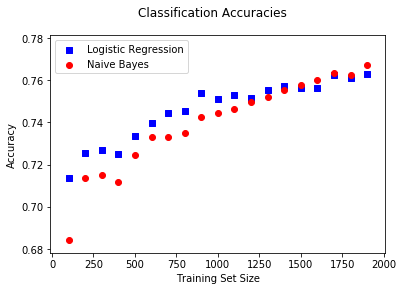

In [165]:
#Plot the graph
#print(len(graph_x))
#print(len(graphA_y))
fig = plt.figure()
fig.suptitle('Classification Accuracies')
graph = fig.add_subplot(111)
graph.scatter(graph_x, graphA_y, c='b', marker="s", label="Logistic Regression")
graph.scatter(graph_x, graphB_y, c='r', marker="o", label="Naive Bayes")
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.show()

**Question 3:**

Fit several logistic regression models and (Gaussian) naïve Bayes models to the Pima diabetes dataset from the UCI machine learning repository, varying training set size from 10 to 500 in units of 10. Create a plot comparing how average accuracy from each type model varies with training set size. When does each model perform better and why?

When training size is:  10
Logistic Regression Accuracy = 0.58
Naive Bayes Accuracy = 0.64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  20
Logistic Regression Accuracy = 0.65
Naive Bayes Accuracy = 0.69
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  30
Logistic Regression Accuracy = 0.61
Naive Bayes Accuracy = 0.68
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  40
Logistic Regression Accuracy = 0.67
Naive Bayes Accuracy = 0.69
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  50
Logistic Regression Accuracy = 0.75
Naive Bayes Accuracy = 0.68
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  60
Logistic Regression Accuracy = 0.69
Naive Bayes Accuracy = 0.73
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  70
Logistic Regression Accuracy = 0.69
Naive Bayes Accuracy = 0.73
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
When training size is:  80
Logistic Regression Accuracy = 0.71
Naive Bayes Accuracy

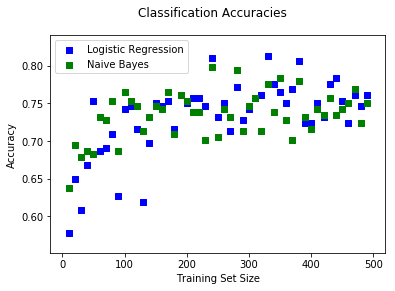

In [150]:
#Block B
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import svm, datasets
import time
C = 1.0

# Import the raw dataset
diabetes_raw = pd.read_csv("diabetes.data", header=None)
# Drop any na values
diabetes_cleaned = diabetes_raw.dropna(how='any')

n_samples = len(diabetes_cleaned)
graphA_y = []
graphB_y = []
graph_x = []

# Setting the parameter for the for loop
train_size_start = 10
train_size_end = 500 
interval = 10

for size in range(train_size_start, train_size_end, interval):
    # Create new Logistic Regression instance
    lr = LogisticRegression()
    nb = GaussianNB()
    #svmclassifier = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    #svmclassifier = svm.SVC(kernel='linear', C=C)
    
    # shuffle the data directly in pandas
    diabetes_cleaned_shuffled = shuffle(diabetes_cleaned)
    diabetes_x = diabetes_cleaned_shuffled.iloc[:, 0:8]
    diabetes_y = diabetes_cleaned_shuffled.iloc[:, 8]
    
    train_x = diabetes_x[:size]
    train_y = diabetes_y[:size]
    test_x = diabetes_x[500:]
    test_y = diabetes_y[500:]
    # Fit both models
    
    start = time.time()
    lr.fit(train_x, train_y)
    end = time.time()
    #print("Logistic Regression takes: ", end-start, " seconds")
    
    start = time.time()
    nb.fit(train_x, train_y)
    end = time.time()
    #print("Naive Bayes takes: ", end-start, " seconds")
    
    graph_x.append(size)
    
    
    graphA_y.append(lr.score(test_x, test_y))
    graphB_y.append(nb.score(test_x, test_y))
    
    print("When training size is: ", size)
    print("Logistic Regression Accuracy = %.2f" % lr.score(test_x, test_y))
    print("Naive Bayes Accuracy = %.2f" % nb.score(test_x, test_y))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
# Plotting the Accuracies    
fig = plt.figure()
fig.suptitle('Classification Accuracies')
graph = fig.add_subplot(111)
graph.scatter(graph_x, graphA_y, c='b', marker="s", label="Logistic Regression")
graph.scatter(graph_x, graphB_y, c='g', marker="s", label="Naive Bayes")
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.show()

**Question 4:**

Using data from the US Social Security Administration (https://www.ssa.gov/oact/babynames/limits.html), develop a gender classifier using only full names as features.  Compare the classifier from # 2 to this classifier. What does these new classifiers predict for the list of students in this course (for simplicity, assume that undergraduate students in this course were born in 1995, and graduate students were born in 1985)? 

In [177]:
import pandas as pd
import numpy as np

featname = ["Name", "Gender","Count"]
names_1985_dtf = pd.read_csv("yob1985.txt", header = None, names = featname)
names_1995_dtf = pd.read_csv("yob1995.txt",header = None, names = featname)
names_1995_dtf.tail()

,Name,Gender,Count
26075,Zerek,M,5
26076,Zhen,M,5
26077,Ziggy,M,5
26078,Zuberi,M,5
26079,Zyon,M,5


In [191]:
def predict_name(MLA, USSAdata, alp):
    gen_pred = []
    for name in MLA:
        PR_name_male = (USSAdata[(USSAdata["Gender"] == 'M' ) & (USSAdata["Name"] == name)].Count.sum() + alp)/(USSAdata[(USSAdata["Gender"] == 'M')].Count.sum() + alp)
        PR_name_female = (USSAdata[(USSAdata["Gender"] == 'F' ) & (USSAdata["Name"] == name)].Count.sum() + alp)/(USSAdata[(USSAdata["Gender"] == 'F')].Count.sum() + alp)
        PR_male = (USSAdata[(USSAdata["Gender"] == 'M')].Count.sum())/(USSAdata.Count.sum() + alp)
        PR_female = (USSAdata[(USSAdata["Gender"] == 'F')].Count.sum())/(USSAdata.Count.sum() + alp )
        gender_pr = (PR_name_male * PR_male)/(PR_name_female * PR_female + PR_name_male * PR_male)
        if (gender_pr > 0.5):
            #Its male
            gen_pred.append('male')
        else:
            #Its female
            gen_pred.append('female')
    return gen_pred

In [204]:
pg_names = ["Amal",
           "Amirah",
           "Devin",
           "Jane",
           "Nivea",
           "Hyuk",
           "Hanting",
           "Xi",
           "Yiwei",
            "Zhenglin",
           "Mykola"]

ug_names = ["Philip",
           "Willie",
           "Ethan",
           "Seamus"]

pg_gender = ["female",
                "female",
                "male",
                "female",
                "female",
                "male",
                "male",
                "male",
                "male",
                "male",
                "female"]

ug_gender = ["male",
                "male",
              "male",
                "male",]

In [205]:
print(gender_pred_ug)
print(gender_pred_pg)

['male', 'male', 'male', 'male']
['female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male']


In [206]:
gender_pred_ug = []
gender_pred_pg = []

gender_pred_ug = predict_name(ug_names, names_1995_dtf, alp = 1)
gender_pred_pg = predict_name(pg_names, names_1985_dtf, alp = 1)

#Predictions and Accuracy for Undergrads
acc_ug=[]
print("Undergraduate students:")  
for u, name in enumerate(ug_names):
    print(name, " is predicted as ", gender_pred_ug[u])
    acc_ug.append(gender_pred_ug[u] == ug_gender[u])
print("Classifier Accuracy for Undergrads:",sum(acc_ug)/len(acc_ug))

#Predictions and Accuracy for Grads
acc_pg=[]
print("\n\nGraduate students:")
for p, name in enumerate(pg_names):
    print(name, " is predicted as ", gender_pred_pg[p])
    acc_pg.append(gender_pred_pg[p] == pg_gender[p])
print("Classifier Accuracy for Grads:",sum(acc_pg)/len(acc_pg))



Undergraduate students:
Philip  is predicted as  male
Willie  is predicted as  male
Ethan  is predicted as  male
Seamus  is predicted as  male
Classifier Accuracy for Undergrads: 1.0


Graduate students:
Amal  is predicted as  female
Amirah  is predicted as  female
Devin  is predicted as  male
Jane  is predicted as  female
Nivea  is predicted as  female
Hyuk  is predicted as  male
Hanting  is predicted as  male
Xi  is predicted as  male
Yiwei  is predicted as  male
Zhenglin  is predicted as  male
Mykola  is predicted as  male
Classifier Accuracy for Grads: 0.9090909090909091


In [207]:
# Name list with different years.

newnames = ["Dylan", "Madison", "Tyler", "Dana"]

featname = ["Name", "Gender","Count"]
names_1988_dtf = pd.read_csv("yob1988.txt", header = None, names = featname)
names_1997_dtf = pd.read_csv("yob1997.txt",header = None, names = featname)
names_2015_dtf = pd.read_csv("yob2015.txt",header = None, names = featname)

names_2015_dtf.tail()

,Name,Gender,Count
33058,Zykell,M,5
33059,Zyking,M,5
33060,Zykir,M,5
33061,Zyrus,M,5
33062,Zyus,M,5


In [208]:
#Finding the probability of gender for years 1988, 1997 and, 2015
gender_pred_1988 = []
gender_pred_1997 = []
gender_pred_2015 = []


gender_pred_1988 = predict_name(newnames, names_1988_dtf, alp = 1)
gender_pred_1997 = predict_name(newnames, names_1997_dtf, alp = 1)
gender_pred_2015 = predict_name(newnames, names_2015_dtf, alp = 1)

#Predictions for each year
print("\nIn 1988:")  
for u, name in enumerate(newnames):
    print(name, " is predicted as ", gender_pred_1988[u])
    
print("\nIn 1997:")  
for u, name in enumerate(newnames):
    print(name, " is predicted as ", gender_pred_1988[u])
    
print("\nIn 2015:")  
for u, name in enumerate(newnames):
    print(name, " is predicted as ", gender_pred_1988[u])


In 1988:
Dylan  is predicted as  male
Madison  is predicted as  female
Tyler  is predicted as  male
Dana  is predicted as  female

In 1997:
Dylan  is predicted as  male
Madison  is predicted as  female
Tyler  is predicted as  male
Dana  is predicted as  female

In 2015:
Dylan  is predicted as  male
Madison  is predicted as  female
Tyler  is predicted as  male
Dana  is predicted as  female


**Question 5:**

Do the tutorial at http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html  
a.	Explain the “curse of dimensionality” in your own words and describe how this problem is addressed by 

i.	k-Nearest-Neighbor  
ii.	MaxEnt  
iii.	Naïve Bayes, and   
iv.	Support Vector classifiers   


In [209]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [212]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [211]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

**Question 6:**

Do the example assignment at http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

a.	Comment each line of code, explaining its function

b.	Explain the concept of a maximum-margin hyperplane in your own words.


Automatically created module for IPython interactive environment


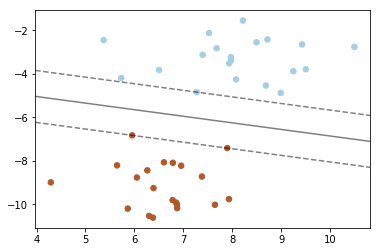

In [213]:
print(__doc__)

#Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Fit the model, no regularization done.
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30) #Returns evenly spaced numbers over a specified interval.
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)           #This returns matrices from vectors.
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape) #Distance of the samples X from the separating hyperplane and reshapes it to the shape of XX.

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

**Question 7:**

Use a linear SVM to construct a sentiment classifier using the Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Repository

a.	Include all features and use them to construct a soft-margin linear SVM classifier using a standard hinge loss function. Using 10-fold cross-validation, what is this classifier’s accuracy? 

b.	Explain a hinge loss function in your own words

c.	Use a non-linear kernel (rbf,poly) to generate classification results. What is this classifier’s accuracy? Is there another metric, besides accuracy, that would lead you to favor the classifier with the lower accuracy? (f1, precision, recall)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols = ["ID", "Diagnosis", 
       "M_radius", "SE_radius", "W_radius",
      "M_texture", "SE_texture", "W_texture",
      "M_perimeter", "SE_perimeter", "W_perimeter",
      "M_area", "SE_area", "W_area",
      "M_smoothness", "SE_smoothness", "W_smoothness",
      "M_compactness", "SE_compactness", "W_compactness",
      "M_concavity", "SE_concavity", "W_concavity",
      "M_concave points", "SE_concave points", "W_concave points",
      "M_symmetry", "SE_symmetry", "W_symmetry",
      "M_fract dimension", "SE_fract dimension", "W_fract dimension"]
wdbc = pd.read_csv("wdbc.data.txt", header=None, names=cols)
wdbc.head()


,ID,Diagnosis,M_radius,SE_radius,W_radius,M_texture,SE_texture,W_texture,M_perimeter,SE_perimeter,...,W_concavity,M_concave points,SE_concave points,W_concave points,M_symmetry,SE_symmetry,W_symmetry,M_fract dimension,SE_fract dimension,W_fract dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
wdbc.Diagnosis.unique()

wdbc['Diagnosis'] = wdbc['Diagnosis'].map({'M':1,'B':0})
wdbc.head()

,ID,Diagnosis,M_radius,SE_radius,W_radius,M_texture,SE_texture,W_texture,M_perimeter,SE_perimeter,...,W_concavity,M_concave points,SE_concave points,W_concave points,M_symmetry,SE_symmetry,W_symmetry,M_fract dimension,SE_fract dimension,W_fract dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


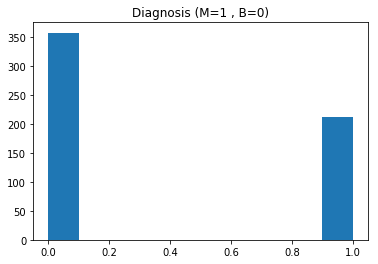

In [3]:
wdbc.describe()
plt.hist(wdbc['Diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [4]:
features_mean=list(wdbc.columns[1:11])
# split dataframe into two based on diagnosis
wdbcM=wdbc[wdbc['Diagnosis'] ==1]
wdbcB=wdbc[wdbc['Diagnosis'] ==0]

C:\Users\Nivea\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


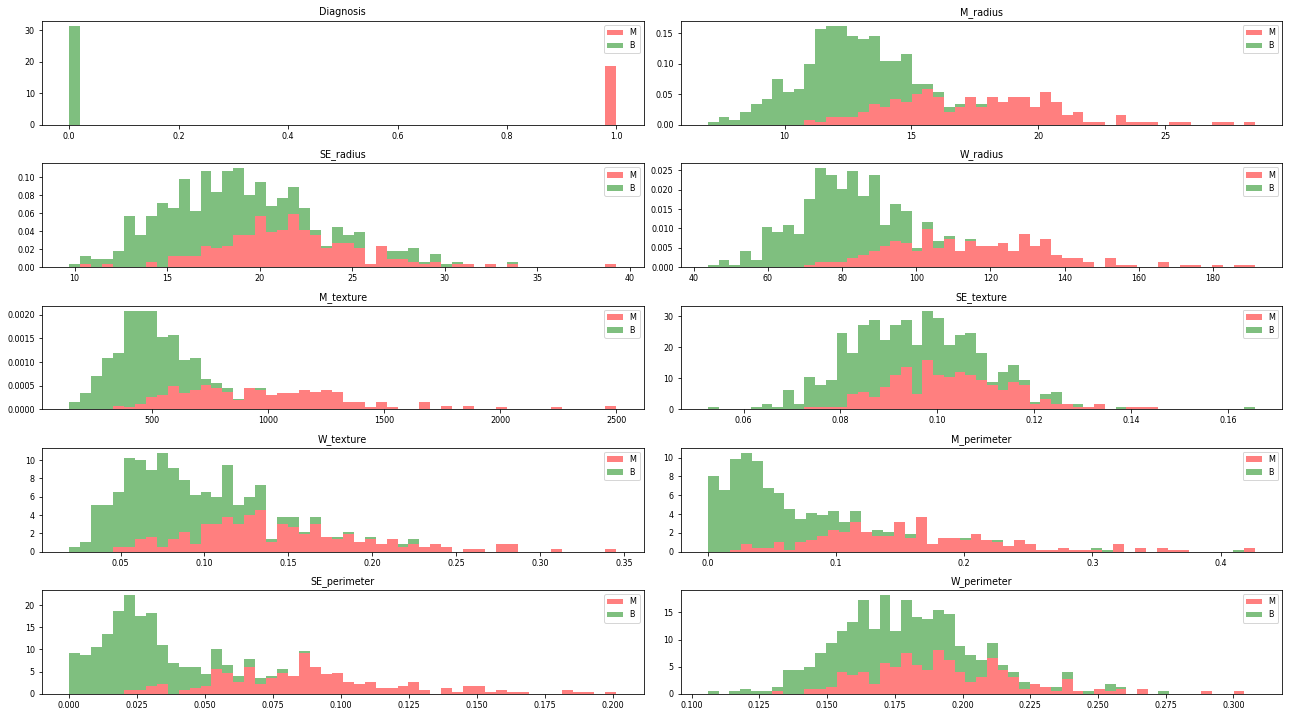

In [5]:
#Showing the correlation of the data using plots
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(wdbc[features_mean[idx]]) - min(wdbc[features_mean[idx]]))/50
    ax.hist([wdbcM[features_mean[idx]],wdbcB[features_mean[idx]]], bins=np.arange(min(wdbc[features_mean[idx]]), max(wdbc[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [6]:
#Assigning Target and Data
datacols = [col for col in wdbc.columns if col not in ['Diagnosis']]
X = wdbc[datacols].values
Y = wdbc["Diagnosis"].values
print(X.shape)
from sklearn.metrics import accuracy_score

(569, 31)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from sklearn import svm
from sklearn.model_selection import train_test_split
#Splitting into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
C = 1.0
#clf_wdbc = LinearSVC(loss = 'hinge')
clf_wdbc = svm.SVC(kernel='rbf')
#clf_wdbc = BernoulliNB()
#clf_wdbc = LogisticRegression()
#clf_wdbc = svm.SVC(kernel='poly', decision_function_shape='ovo')
#clf_wdbc = svm.SVC(kernel='sigmoid', C=C)
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
#Fit the model:
clf_wdbc.fit(X_train, y_train) 

#Predict the outcome
Predicted_Y = clf_wdbc.predict(X_test)

#Print accuracy
accuracy = accuracy_score(Predicted_Y, y_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

scr = precision_recall_fscore_support(y_test, Predicted_Y, average='binary')
print("Scores:", scr[0])

cv = KFold(n_splits=10)
scores = []
accuracy_res = []

for i, (train_wdbc, test_wdbc) in enumerate(cv.split(X)):
    #print("test size, train size",len(test_wdbc), len(train_wdbc))
    clf_wdbc.fit(X[train_wdbc], Y[train_wdbc])
    Predicted_Y = clf_wdbc.predict(X[test_wdbc])
    #print(Predicted_Y)
    for j in range(Predicted_Y.shape[0]):
        if(Predicted_Y[j]<0.5):
            Predicted_Y[j] = 0
        else :
            Predicted_Y[j] = 1
    print("Accuracy of ",i+1," trial :", accuracy_score(Predicted_Y, Y[test_wdbc]))
    accuracy_res.append(accuracy_score(Predicted_Y, Y[test_wdbc]))
    print("Lengths:\n",Predicted_Y)
    print(Y[test_wdbc])
    scores.append(precision_recall_fscore_support(Y[test_wdbc], Predicted_Y, average='binary'))
    print("Scores:", scores[i])
print("\nAverage Accuracy:", np.mean(accuracy_res))
print("Average Precision:",np.mean(list(zip(*scores))[0]))
print("Average Recall:",np.mean(list(zip(*scores))[1]))
print("Average Fscore:",np.mean(list(zip(*scores))[2]))

**Output:**

Linear SVM Average Accuracy: 0.646961152882  <br>
Average Precision: 0.516895604396
Average Recall: 0.334216779597
Average Fscore: 0.286517069133 <br>

RBF Average Accuracy: 0.627662907268 <br>

Poly Average Accuracy: 0.578960983211 <br> For 2 splits (since the processing power of my laptop is really low)

Average Precision: 0.50877192982456143
Average Recall: 1.0
Average Fscore: 0.67441860465116277 <br>

**Question 8:**
Do the example classifications at http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

a.	Comment each line of code, explaining its function

b.	Explain the results of each of these outputs. How do they differ and why?

c.	Explain the “kernel trick” in your own words
    

Automatically created module for IPython interactive environment


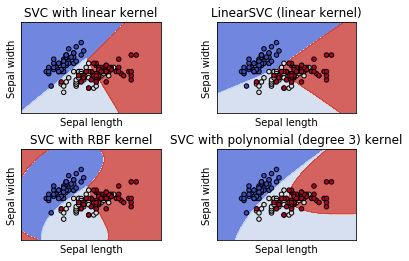

In [250]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):  #Function defined for the purpose of creating a grid
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]  #The data considers only the first two features - sepal length and width
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

**Question 10:**

EXTRA CREDIT: Using all of the classifier types that you’ve learned so far (MaxEnt, Naïve Bayes, SVM), create sentiment classifiers using the UCI Sentiment Labeled Sentences dataset. Report their respective accuracy scores. Which classifier would you use for this task and why? (HINT: Performance of the Naïve Bayes classifier can be boosted using TF-IDF weighting) (positive/negative review)

In [21]:
import pandas as pd
import numpy as np
# load yelp reviews dataset with feature selection
df_sentiment = pd.read_csv('yelp_labelled.txt', sep ="\t", names= ['text','sentiment'])
df_sentiment.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [22]:
#Converting text into Numpy arrays
X = df_sentiment["text"].values
Y = df_sentiment["sentiment"].values

print(X.shape)
print(Y.shape)

(1000,)
(1000,)


In [50]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
#Splitting into 90:10 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))
y_test.shape

900 100 900 100


(100,)

In [51]:
# TF-IDF transformation for train set
from sklearn.feature_extraction.text import TfidfVectorizer
sentiment_tf = TfidfVectorizer()
X_train_tf = sentiment_tf.fit_transform(X_train)
#X_train_tf.shape

In [52]:
# TF_IDF tranform method applied to the test data
X_test_tf = sentiment_tf.transform(X_test)
#X_test_tf.shape

In [53]:
# Initializing the classifiers and fitting the data
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm


bnb = BernoulliNB().fit(X_train_tf, y_train)
lr = LogisticRegression(C=1.0, penalty='l2').fit(X_train_tf, y_train)
svc_lin = svm.SVC(kernel="linear", C=1.0, gamma="auto").fit(X_train_tf, y_train)
svc_rbf = svm.SVC(kernel="rbf", C=1.0, gamma="auto").fit(X_train_tf, y_train)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

scr_bnb =[]
pred_y_bnb = bnb.predict(X_test_tf)
#print(pred_y_bnb)
print("Bernoulli Naive Bayes : \nAccuracy:", accuracy_score(pred_y_bnb, y_test))
scr_bnb = precision_recall_fscore_support(y_test, pred_y_bnb)
print("Scores: ")
print("Precision:",np.mean(scr_bnb[0]))
print("Recall:",np.mean(scr_bnb[1]))
print("Fscore:",np.mean(scr_bnb[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")

scr_lr =[]
pred_y_lr = lr.predict(X_test_tf)
print("Logistic Regression : \nAccuracy:", accuracy_score(pred_y_lr, y_test))
scr_lr = precision_recall_fscore_support(y_test, pred_y_lr)
print("Scores: ")
print("Precision:",np.mean(scr_lr[0]))
print("Recall:",np.mean(scr_lr[1]))
print("Fscore:",np.mean(scr_lr[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")

scr_lin =[]
pred_y_svclin = svc_lin.predict(X_test_tf)
print("SVM - Linear  : \nAccuracy:", accuracy_score(pred_y_svclin, y_test))
scr_lin = precision_recall_fscore_support(y_test, pred_y_svclin)
print("Scores: ")
print("Precision:",np.mean(scr_lin[0]))
print("Recall:",np.mean(scr_lin[1]))
print("Fscore:",np.mean(scr_lin[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")

scr_rbf =[]
pred_y_rbf = svc_rbf.predict(X_test_tf)
print("SVM - RBF : \nAccuracy:", accuracy_score(pred_y_rbf, y_test))
scr_rbf = precision_recall_fscore_support(y_test, pred_y_rbf)
print("Scores: ")
print("Precision:",np.mean(scr_rbf[0]))
print("Recall:",np.mean(scr_rbf[1]))
print("Fscore:",np.mean(scr_rbf[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Bernoulli Naive Bayes : 
Accuracy: 0.74
Scores: 
Precision: 0.754518705338
Recall: 0.742296918768
Fscore: 0.737373737374
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Logistic Regression : 
Accuracy: 0.84
Scores: 
Precision: 0.841830590124
Recall: 0.840736294518
Fscore: 0.83993597439
~~~~~~~~~~~~~~~~~~~~~~~~~~~
SVM - Linear  : 
Accuracy: 0.84
Scores: 
Precision: 0.844444444444
Recall: 0.841136454582
Fscore: 0.839743589744
~~~~~~~~~~~~~~~~~~~~~~~~~~~
SVM - RBF : 
Accuracy: 0.49
Scores: 
Precision: 0.245
Recall: 0.5
Fscore: 0.328859060403
~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Users\Nivea\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
for d, emo in zip(X_test, pred_y_bnb):
    print('%r => %s' % (d, Y[emo]))

'the presentation of the food was awful.' => 0
"Worst food/service I've had in a while." => 0
'Never again will I be dining at this place!' => 1
'I guess maybe we went on an off night but it was disgraceful.' => 1
'As a sushi lover avoid this place by all means.' => 1
"The ambiance isn't much better." => 1
'This hole in the wall has great Mexican street tacos, and friendly staff.' => 0
"If the food isn't bad enough for you, then enjoy dealing with the world's worst/annoying drunk people." => 1
'Will never, ever go back.' => 1
'The atmosphere here is fun.' => 0
'The pancake was also really good and pretty large at that.' => 0
'All of the tapas dishes were delicious!' => 0
"The chains, which I'm no fan of, beat this place easily." => 0
'Everyone is very attentive, providing excellent customer service.' => 0
'The staff are also very friendly and efficient.' => 0
'Loved it...friendly servers, great food, wonderful and imaginative menu.' => 0
'After the disappointing dinner we went elsewher

In [62]:
newdata = ["Great place", "Good ambience and good food", "Love it", "Rude waiters"]

X_new_tf = sentiment_tf.transform(newdata)

predicted = bnb.predict(X_new_tf)

for doc, sentiment in zip(newdata, predicted):
    print('%r => %s' % (doc, Y[sentiment]))

'Great place' => 0
'Good ambience and good food' => 0
'Love it' => 0
'Rude waiters' => 1


**Question 11:**

Fit a MaxEnt (ME) model, a Naïve Bayes (NB) model, and a Support Vector classifier model to the Thoracic Surgery Data dataset, which aims to predict 1-year survival rate of thoracic surgery patients. <br>
a.	Calculate the baseline proportion of the population that survives for greater than one year. If necessary, undersample (sklearn undersample package) the population such that there are equal numbers of survivors and non-survivors.<br>
b.	Select a model scoring criterion and justify your choice in the context of the dataset. (use one of the metrics like precision, recall etc) <br>
c.	Use grid search cross validation to select the best-fitting classifier for each type of model. What is the best fitting model in each category, and what is its score?  <br>
d.	After applying 10-fold cross-validation, generate an averaged contingency table for each best-fitting classifier in the ME, Bernoulli NB, and SVC categories.  <br>
e.	For each best-fitting classifier, indicate the following:
i.	Accuracy
ii.	Precision
iii.	Recall
iv.	F1 <br>
f.	For each best-fitting classifier generate a plot of the ROC curve and indicate the AUC <br>
g.	Make an argument for the selection of a classifier based on the metrics listed above; however, do not base your argument solely on the metric selected for part a, and justify your choice. 


In [1]:
import pandas as pd
import numpy as np
colnames = ["DGN","PRE4","PRE5","PRE6","PRE7","PRE8","PRE9","PRE10","PRE11","PRE14"
            ,"PRE17","PRE19","PRE25","PRE30","PRE32","AGE","Risk1Yr"]

ts_df = pd.read_csv("thoracicsurgery.txt", names = colnames)

ts_df.head()


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [2]:
#Finding the survivors and non survivors 
import numpy as np

survivors = ts_df[ts_df['Risk1Yr'] == 'T']
print("Survivors:",len(survivors))
non_survivors =  ts_df[ts_df['Risk1Yr'] == 'F']
print("Non-Survivors:",len(non_survivors))
print("Probabilities:\n",ts_df.Risk1Yr.value_counts(normalize=True))

Survivors: 70
Non-Survivors: 400
Probabilities:
 F    0.851064
T    0.148936
Name: Risk1Yr, dtype: float64


In [3]:
#Separating the numerical and categorical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

categorical_ts = [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13 ,14]
print(categorical_ts)
continuous_ts = [1,2,15]

#Seperating data and target
datacols = [col for col in ts_df.columns if col not in ['Risk1Yr']]
            
X = ts_df[datacols].values

y = ts_df["Risk1Yr"].values

lenc_x= LabelEncoder()
for c in categorical_ts:
    X[:,c] = lenc_x.fit_transform(X[:,c]) 
ohc = OneHotEncoder(categorical_features = categorical_ts)
X = ohc.fit_transform(X).toarray()

# Encoding the Target
lenc_y = LabelEncoder()
y = lenc_y.fit_transform(y)

# Feature Scaling
ssc_x = StandardScaler()
for c in continuous_ts:
    X[:,c:] = ssc_x.fit_transform(X[:,c:])
    
print(np.unique(y))
print("Number of Survivors:",np.bincount(y)[0])
print("Number of Non-Survivors:",np.bincount(y)[1])

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0 1]
Number of Survivors: 400
Number of Non-Survivors: 70


In [16]:
# Under-sampling the dataset to render balanced classes
from imblearn.under_sampling import RandomUnderSampler
undersamp = RandomUnderSampler(random_state=0)
X, y = undersamp.fit_sample(X, y)

print(np.unique(y))
print("Number of Survivors:",np.bincount(y)[0])
print("Number of Non-Survivors:",np.bincount(y)[1])


[0 1]
Number of Survivors: 70
Number of Non-Survivors: 70


In [21]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import cross_validation
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

cv = cross_validation.KFold(len(X), n_folds=10)
acc_res = []
cm_totallr= np.zeros((2,2))


print("\n Logistic Regression Accuracy")
for i, (train_ts, test_ts) in enumerate(cv):
    clf = LogisticRegression()
    clf.fit(X[train_ts],y[train_ts])
    y_predclf = clf.predict(X[test_ts])
    print(i+1 ,"Trial Accuracy: ",accuracy_score(y_predclf, y[test_ts]))
    acc_res.append(accuracy_score(y_predclf, y[test_ts]))
    cm_lr = confusion_matrix(y[test_ts], y_predclf)
    cm_totallr += cm_lr
print("\n")
print("Avg. Accuracy for Logistic Regression: ",np.mean(acc_res))
print("Confusion Matrix for Logistic Regression: \n",cm_totallr)
print("\n Bernoulli Naive Bayes Accuracy")

cv = cross_validation.KFold(len(X), n_folds=10)
acc_resnb = []
#Naive Bayes Classifier
cm_totalbnb= np.zeros((2,2))
for i, (train_ts, test_ts) in enumerate(cv):
    bnb = BernoulliNB()
    bnb.fit(X[train_ts], y[train_ts])
    y_predbnb = bnb.predict(X[test_ts])
    print(i+1 ,"Trial Accuracy: ",accuracy_score(y_predbnb,  y[test_ts]))
    acc_resnb.append(accuracy_score(y_predbnb, y[test_ts]))
    cm_bnb = confusion_matrix(y[test_ts], y_predbnb)
    cm_totalbnb += cm_bnb
print("\n")
print("Avg. Accuracy for Bernoulli Naive Bayes: ",np.mean(acc_resnb))
print("Confusion Matrix for Bernoulli Naive Bayes: \n",cm_totalbnb)

cv = cross_validation.KFold(len(X), n_folds=10)
print("\n SVC - Linear Accuracy")
acc_reslin = []
#SVM Classifier
cm_totallin= np.zeros((2,2))
for i, (train_ts, test_ts) in enumerate(cv):
    svclin = svm.SVC(kernel="linear", C=1.0)
    svclin.fit(X[train_ts], y[train_ts])
    y_predlin = svclin.predict(X[test_ts])
    print(i+1 ,"Trial Accuracy: ",accuracy_score(y_predlin,  y[test_ts]))
    acc_reslin.append(accuracy_score(y_predlin, y[test_ts]))
    cm_lin = confusion_matrix(y[test_ts], y_predlin)
    cm_totallin += cm_bnb
print("\n")
print("Avg. Accuracy for SVC - Linear: ",np.mean(acc_reslin))
print("Confusion Matrix for SVC - Linear: \n",cm_totallin)


 Logistic Regression Accuracy
1 Trial Accuracy:  0.5
2 Trial Accuracy:  0.5714285714285714
3 Trial Accuracy:  0.7142857142857143
4 Trial Accuracy:  0.42857142857142855
5 Trial Accuracy:  0.42857142857142855
6 Trial Accuracy:  0.35714285714285715
7 Trial Accuracy:  0.5
8 Trial Accuracy:  0.35714285714285715
9 Trial Accuracy:  0.42857142857142855
10 Trial Accuracy:  0.5


Avg. Accuracy for Logistic Regression:  0.47857142857142854
Confusion Matrix for Logistic Regression: 
 [[37. 33.]
 [40. 30.]]

 Bernoulli Naive Bayes Accuracy
1 Trial Accuracy:  0.42857142857142855
2 Trial Accuracy:  0.6428571428571429
3 Trial Accuracy:  0.5714285714285714
4 Trial Accuracy:  0.5714285714285714
5 Trial Accuracy:  0.5
6 Trial Accuracy:  0.35714285714285715
7 Trial Accuracy:  0.6428571428571429
8 Trial Accuracy:  0.35714285714285715
9 Trial Accuracy:  0.5714285714285714
10 Trial Accuracy:  0.5714285714285714


Avg. Accuracy for Bernoulli Naive Bayes:  0.5214285714285714
Confusion Matrix for Bernoulli Nai

In [24]:
from sklearn.metrics import precision_recall_fscore_support
lrscore =[]
print("Logistic regression")
lrscore = precision_recall_fscore_support(y[test_ts], y_predclf)
print("Scores: ")
print("Precision:",np.mean(lrscore[0]))
print("Recall:",np.mean(lrscore[1]))
print("Fscore:",np.mean(lrscore[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("")
print("Bernoulli Naive Bayes")
bnbscore = precision_recall_fscore_support(y[test_ts], y_predbnb)
print("Scores: ")
print("Precision:",np.mean(bnbscore[0]))
print("Recall:",np.mean(bnbscore[1]))
print("Fscore:",np.mean(bnbscore[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("")
print("SVC")
svcscore = precision_recall_fscore_support(y[test_ts], y_predlin)
print("Scores: ")
print("Precision:",np.mean(svcscore[0]))
print("Recall:",np.mean(svcscore[1]))
print("Fscore:",np.mean(svcscore[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Logistic regression
Scores: 
Precision: 0.5
Recall: 0.25
Fscore: 0.3333333333333333
~~~~~~~~~~~~~~~~~~~~~~~~~~~

Bernoulli Naive Bayes
Scores: 
Precision: 0.5
Recall: 0.2857142857142857
Fscore: 0.36363636363636365
~~~~~~~~~~~~~~~~~~~~~~~~~~~

SVC
Scores: 
Precision: 0.5
Recall: 0.25
Fscore: 0.3333333333333333
~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Users\Nivea\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Grid search for best parameters

# Explicitly specify default parameters fro each classifier for convenience
svc_rbf = svm.SVC(kernel="rbf", C=1.0, gamma="auto")
svc_lin = svm.LinearSVC(C=1.0, loss="squared_hinge")
bnb = BernoulliNB(alpha = 1.0)
lr = LogisticRegression(C=1.0, penalty='l2')

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# SVC with rbf kernel
tuned_parameters_svc = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

clfgs = GridSearchCV(svc_rbf, tuned_parameters_svc, cv=5, scoring="recall")
clfgs.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()

print("SVC with rbf kernel:")
print(clfgs.best_params_)
y_true, y_pred = y_test, clfgs.predict(X_test)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))



# Linear SVC
tuned_parameters_lin_svc = [{'C': [1, 10, 100, 1000], "loss" : ["squared_hinge", "hinge"]}]

clfgs = GridSearchCV(svc_lin, tuned_parameters_lin_svc, cv=5, scoring="recall")
clfgs.fit(X_train, y_train)

print("-----------------------------------------------------")

print("Linear SVC:")
print(clfgs.best_params_)
y_true, y_pred = y_test, clfgs.predict(X_test)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


# BerNB
tuned_parameters_berNB = [{'alpha': [1, 10, 100, 1000]}]

clfgs = GridSearchCV(bnb, tuned_parameters_berNB, cv=5, scoring="recall")
clfgs.fit(X_train, y_train)

print("-----------------------------------------------------")

print("Bernoulli Naive Bayes:")
print(clfgs.best_params_)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


# Logistic Regression
tuned_parameters_lr = [{"C" : [1, 10, 100, 1000]}]

clfgs = GridSearchCV(lr, tuned_parameters_lr, cv=5, scoring="recall")
clfgs.fit(X_train, y_train)

print("-----------------------------------------------------")

print("Logistic Regression:")
print(clfgs.best_params_)
y_true, y_pred = y_test, clfgs.predict(X_test)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

Best parameters set found on development set:

SVC with rbf kernel:
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
             precision    recall  f1-score   support

          0       0.60      0.62      0.61        34
          1       0.63      0.61      0.62        36

avg / total       0.61      0.61      0.61        70

[[21 13]
 [14 22]]
-----------------------------------------------------
Linear SVC:
{'C': 1, 'loss': 'hinge'}
             precision    recall  f1-score   support

          0       0.61      0.59      0.60        34
          1       0.62      0.64      0.63        36

avg / total       0.61      0.61      0.61        70

[[20 14]
 [13 23]]
-----------------------------------------------------
Bernoulli Naive Bayes:
{'alpha': 1}
             precision    recall  f1-score   support

          0       0.68      0.76      0.72        34
          1       0.75      0.67      0.71        36

avg / total       0.72      0.71      0.71        70

[[26  8]
 [12 24]]
---

In [34]:
# Fitting logistic regression with best parameters found

acc_reslr = []
lr_cm = np.zeros(shape = (2,2) )

cv = cross_validation.KFold(len(X), n_folds=10)

# Fit logistic regression with the largest magnitude coeefcient, which is weight
for ix, (traincv, testcv) in enumerate(cv):
    # Create new logistic regression instance
    classifier = LogisticRegression(C=1.0)
    # Fit the model
    classifier.fit(X[traincv], y[traincv])
    y_pred = classifier.predict(X[testcv])
       
    acc_reslr.append(accuracy_score(y_pred, y[testcv]))
    cm = confusion_matrix(y[testcv], y_pred)
    lr_cm += cm
    

print("\n")
print("Avg. accuracy: ",np.mean(acc_reslr))

print("\nAgg. contingency table")    
print(lr_cm)
print("\nAvg. contingency table")    
print(lr_cm/10)
lrscore = precision_recall_fscore_support(y[testcv], y_pred)
print("\nScores: ")
print("Precision:",np.mean(lrscore[0]))
print("Recall:",np.mean(lrscore[1]))
print("Fscore:",np.mean(lrscore[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")



Avg. accuracy:  0.47857142857142854

Agg. contingency table
[[37. 33.]
 [40. 30.]]

Avg. contingency table
[[3.7 3.3]
 [4.  3. ]]

Scores: 
Precision: 0.5
Recall: 0.25
Fscore: 0.3333333333333333
~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Users\Nivea\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [35]:
# Fitting Naive Bayes with best parameters found

acc_resbnb = []
bnb_cm = np.zeros(shape = (2,2) )

cv = cross_validation.KFold(len(X), n_folds=10)

# Fit logistic regression with the largest magnitude coeefcient, which is weight
for ix, (traincv, testcv) in enumerate(cv):
    # Create new logistic regression instance
    classifier = BernoulliNB(alpha=1)
    # Fit the model
    classifier.fit(X[traincv], y[traincv])
    y_pred = classifier.predict(X[testcv])
       
    acc_reslr.append(accuracy_score(y_pred, y[testcv]))
    cm = confusion_matrix(y[testcv], y_pred)
    bnb_cm += cm
    

print("\n")
print("Avg. accuracy: ",np.mean(acc_resbnb))

print("\nAgg. contingency table")    
print(bnb_cm)
print("\nAvg. contingency table")    
print(bnb_cm/10)
bnbscore = precision_recall_fscore_support(y[testcv], y_pred)
print("\nScores: ")
print("Precision:",np.mean(bnbscore[0]))
print("Recall:",np.mean(bnbscore[1]))
print("Fscore:",np.mean(bnbscore[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")



Avg. accuracy:  nan

Agg. contingency table
[[38. 32.]
 [35. 35.]]

Avg. contingency table
[[3.8 3.2]
 [3.5 3.5]]

Scores: 
Precision: 0.5
Recall: 0.2857142857142857
Fscore: 0.36363636363636365
~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Users\Nivea\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Nivea\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nivea\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
# Fitting SVM linear with best parameters found

acc_reslin = []
lin_cm = np.zeros(shape = (2,2) )

cv = cross_validation.KFold(len(X), n_folds=10)

# Fit logistic regression with the largest magnitude coeefcient, which is weight
for ix, (traincv, testcv) in enumerate(cv):
    # Create new logistic regression instance
    classifier = svm.LinearSVC(C=1000, loss="hinge")
    # Fit the model
    classifier.fit(X[traincv], y[traincv])
    y_pred = classifier.predict(X[testcv])
       
    acc_reslin.append(accuracy_score(y_pred, y[testcv]))
    cm = confusion_matrix(y[testcv], y_pred)
    lin_cm += cm
    

print("\n")
print("Avg. accuracy: ",np.mean(acc_reslin))

print("\nAgg. contingency table")    
print(lin_cm)
print("\nAvg. contingency table")    
print(lin_cm/10)
linscore = precision_recall_fscore_support(y[testcv], y_pred)
print("\nScores: ")
print("Precision:",np.mean(linscore[0]))
print("Recall:",np.mean(linscore[1]))
print("Fscore:",np.mean(linscore[2]))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")



Avg. accuracy:  0.5142857142857142

Agg. contingency table
[[41. 29.]
 [39. 31.]]

Avg. contingency table
[[4.1 2.9]
 [3.9 3.1]]

Scores: 
Precision: 0.5
Recall: 0.32142857142857145
Fscore: 0.391304347826087
~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Users\Nivea\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


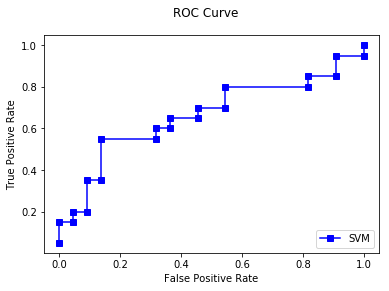

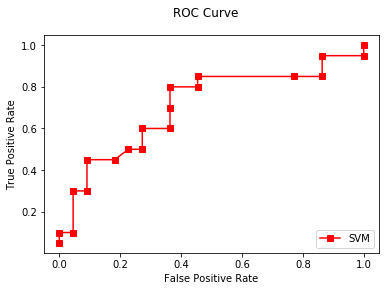

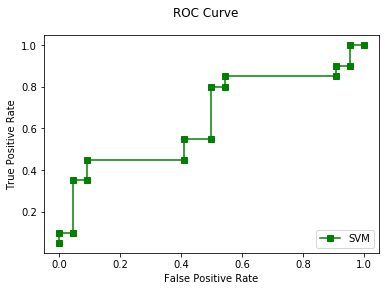

In [41]:
#ROC Curves

from sklearn import svm, datasets, metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svc_rbf = svm.SVC(C = 100, gamma = 0.001, kernel = 'rbf', probability=True)
bnb = BernoulliNB(alpha = 1.0)
lr = LogisticRegression(C=10)

#Splitting data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


y_score = lr.fit(X_train, y_train).predict_proba(X_test)[:, 1]

false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Bernoulli 
y_score = bnb.fit(X_train, y_train).predict_proba(X_test)[:, 1]

false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='red', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#Bernoulli 
y_score = svc_rbf.fit(X_train, y_train).predict_proba(X_test)[:, 1]

false_positive, true_positive, thresholds = metrics.roc_curve(y_test, y_score)
# Notice we are only using the True Y label, Not the Predicted Y label

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='green', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()